In [1]:
import numpy as np

In [11]:
X = 6*np.random.rand(200,1) - 3
y = 0.8 * X**2 + 0.9 * X + 2 + np.random.randn(200,1) # quadratic equation polynomial of degree 2 

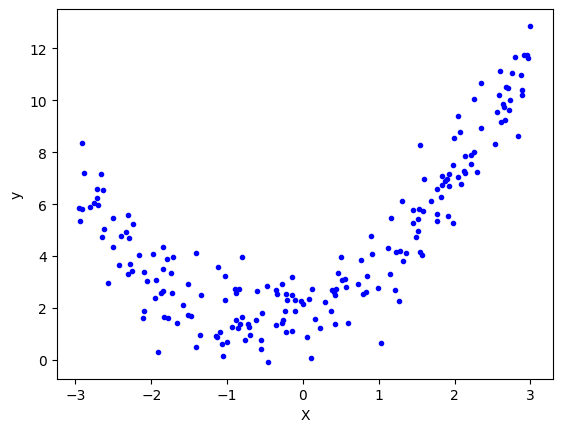

In [12]:
import matplotlib.pyplot as plt 
plt.plot(X,y,'b.')
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)


In [33]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [34]:
lr.fit(X_train,y_train)


LinearRegression()

In [35]:
y_pred = lr.predict(X_test)
y_pred

array([[7.36487283],
       [5.96584517],
       [2.71574621],
       [2.86375322],
       [6.48369914],
       [2.46661344],
       [4.5351251 ],
       [1.88744185],
       [4.27855542],
       [1.81533051],
       [6.23435487],
       [4.4935816 ],
       [4.0635871 ],
       [2.72883998],
       [6.30089195],
       [6.22570738],
       [3.46822234],
       [4.08556794],
       [2.62652612],
       [3.91044748],
       [6.25094523],
       [3.77876271],
       [4.88288671],
       [7.49705551],
       [4.06560374],
       [6.65137814],
       [5.71326144],
       [2.50106399],
       [6.87453962],
       [4.41194034],
       [6.55389588],
       [4.6488301 ],
       [2.71710076],
       [2.27092271],
       [6.88162274],
       [6.41277502],
       [5.67524228],
       [4.75540576],
       [4.17048549],
       [4.72875092]])

In [36]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.040815495540565405

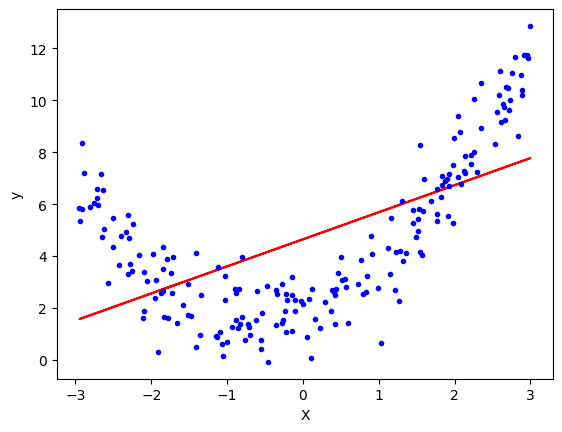

In [37]:
plt.plot(X_train,lr.predict(X_train),color='r')
plt.plot(X,y,'b.')
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [84]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

poly = PolynomialFeatures(degree=2)

X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.fit_transform(X_test)


In [85]:
print(X_train[0])

[-1.90692826]


In [86]:
print(X_train_trans[0])

# X^0 comes because the polynomial function by default uses include_bias = True

[ 1.         -1.90692826  3.63637538]


In [87]:
lr.fit(X_train_trans,y_train)

LinearRegression()

In [88]:
y_pred_poly = lr.predict(X_test_trans)
y_pred_poly

array([[ 9.91088111],
       [ 4.49177832],
       [ 3.04108987],
       [ 2.76870225],
       [ 6.16129632],
       [ 3.57252077],
       [ 1.93434344],
       [ 5.16160068],
       [ 1.79484081],
       [ 5.39407381],
       [ 5.30807768],
       [ 1.90517036],
       [ 1.75267998],
       [ 3.01569028],
       [ 5.52679121],
       [ 5.28013183],
       [ 1.99154935],
       [ 1.75386396],
       [ 3.22089001],
       [ 1.76420018],
       [ 5.36200089],
       [ 1.80175489],
       [ 2.27835198],
       [10.57208755],
       [ 1.75275893],
       [ 6.78661496],
       [ 3.82091981],
       [ 3.49358156],
       [ 7.68313727],
       [ 1.85525297],
       [ 6.41803393],
       [ 2.02720313],
       [ 3.03845056],
       [ 4.05412095],
       [ 7.71279499],
       [ 5.90927645],
       [ 3.72808592],
       [ 2.13154634],
       [ 1.76512953],
       [ 2.1038795 ]])

In [89]:
print(r2_score(y_test,y_pred_poly))
print(lr.coef_)
print(lr.intercept_)

0.8452230682090776
[[0.         0.93545194 0.80120538]]
[2.02524704]


verify X^2 coefficient, X^1 with the variable y in the start of the notebook

In [90]:
X_new = np.linspace(-3, 3, 200).reshape(200,1)
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)

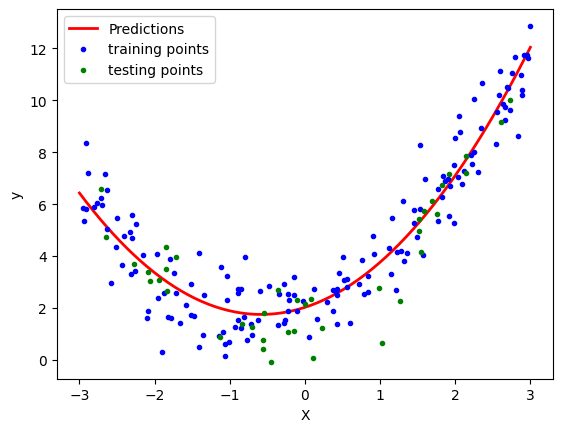

In [91]:
plt.plot(X_new,y_new,"r-",linewidth=2,label='Predictions')
plt.plot(X_train,y_train,"b.",label='training points')
plt.plot(X_test,y_test,"g.",label="testing points")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

On changing values of the degree model starts overfitting